<a href="https://colab.research.google.com/github/chinahamu/paison/blob/master/%E3%82%BF%E3%82%A4%E3%82%BF%E3%83%8B%E3%83%83%E3%82%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df = drive.mount('/content/drive')


([array([ 80.,  97., 372.]), array([216., 184., 491.])],
 array([1.        , 1.66666667, 2.33333333, 3.        ]),
 <a list of 2 Lists of Patches objects>)

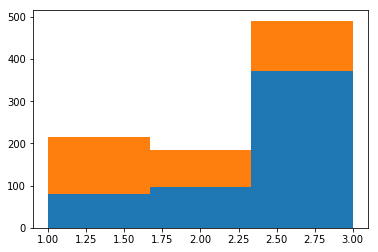

In [18]:
df = pd.read_csv("drive/My Drive/Colab_Notebooks/titanic/train.csv").replace('male',0).replace('female',1)
df['Age'].fillna(df['Age'].median(),inplace=True)

split_data = []

for survived in [0,1]:
  split_data.append(df[df.Survived==survived])
  
temp = [i['Pclass'].dropna() for i in split_data]
plt.hist(temp,histtype='barstacked',bins=3)


([array([ 13.,  13.,   8.,  63.,  80., 191.,  47.,  39.,  30.,  23.,  14.,
          11.,  10.,   3.,   4.,   0.]),
  array([ 44.,  20.,  19.,  96., 122., 285.,  88.,  67.,  47.,  39.,  24.,
          18.,  14.,   3.,   4.,   1.])],
 array([ 0.42   ,  5.39375, 10.3675 , 15.34125, 20.315  , 25.28875,
        30.2625 , 35.23625, 40.21   , 45.18375, 50.1575 , 55.13125,
        60.105  , 65.07875, 70.0525 , 75.02625, 80.     ]),
 <a list of 2 Lists of Patches objects>)

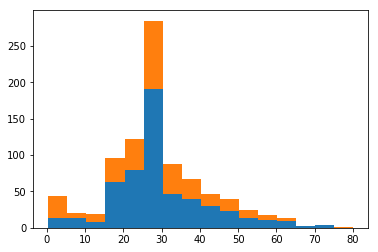

In [19]:
temp = [i['Age'].dropna() for i in split_data]
plt.hist(temp,histtype='barstacked',bins=16)

In [0]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df2 = df.drop(["Name","SibSp","Parch","Ticket","Fare","Cabin","Embarked"],axis=1)

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

train_data = df2.values
xs = train_data[:,2:]
y = train_data[:,1]

forest = RandomForestClassifier(n_estimators = 100)
foresst = forest.fit(xs,y)

test_df = pd.read_csv("drive/My Drive/Colab_Notebooks/titanic/test.csv").replace('male',0).replace('female',1)
test_df['Age'].fillna(test_df['Age'].median(),inplace=True)
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

test_df2 = test_df.drop(["Name","SibSp","Parch","Ticket","Fare","Cabin","Embarked"],axis=1)



In [0]:
test_data = test_df2.values
xs_test = test_data[:,1:]
output = forest.predict(xs_test)

print(len(test_data[:,0]),len(output))

zip_data = zip(test_data[:,0].astype(int),output.astype(int))
predict_data = list(zip_data)

predict_data

In [0]:
import csv

with open("drive/My Drive/Colab_Notebooks/titanic/predict_result_data.csv","w") as f:
  writer = csv.writer(f,lineterminator="\n")
  writer.writerow(["PassengerId","Survived"])
  for pid, survied in zip(test_data[:,0].astype(int),output.astype(int)):
    writer.writerow([pid,survived])